## Teoretiska Frågor

### 1. Beskriv kort hur en relationsdatabas fungerar:

En relationsdatabas är en typ av databas som består av kopplade tabeller. Tabellerna brukar ingå i större samlingar som kallas "Schema" för att hålla databasen organiserad. En tabell består av kolumner som representerar attributer och rader för varje tupel ("record","post","införing").\
Kolumnernas datatyp måste vara specificerad (INT, FLOAT, MONEY, NVARCHAR, DATE)

Varje tabell har en nyckel attribut som skapar själva kopplingen till andra tabeller.\
Det finns 6 olika nyckeltyper, men de två vanligaste är PK och FK:
- Primary Key (PK)
- Foreign Key (FK)
- Composite Key
- Candidate Key
- Alternate Key
- Super Key

PK är den vanligaste typen av nyckel som också är tabellens unika identifierare, det får endast finnas en PK per tabell.\
PK kan bestå av fler än en kolumn, dessa kolumner måste dock innehålla unika värden som är skilda från NULL.\
PK som består av fler än en kolumn kallas för Composite Key.

FK är nyckeln som drar kopplingen till en annan tabell genom att referera till tabellens PK.

Relationerna mellan tabeller kan beskrivas som:
- "One-to-many": Tabellen med FK har flera nycklar, därav flera kopplingar.
- "One-to-one": Tabellen med FK har bara en nyckel, därav endast en koppling.
- "Many-to-many"

### 2. Vad menas med "CRUD"-flödet?

CRUD är en akronym för de grundläggande operationer som kan utföras på data i en databas:
- "Create": lägger till nya rader i en tabell
- "Read": läsa ut data från en tabell
- "Update": uppdaterar existerande data i en tabell
- "Delete": tar bort rader från en tabell

### 3. Beskriv kort vad en "left join " och en "inner join" är. Varför använder man det?

- Left Join: En operation som kombinerar alla rader från två tabeller.\
Används om man vill ha alla rader från den vänstra tabellen, även om de inte existerar i den högra tabellen.
- Inner Join: En operation som kombinerar rader från två tabeller om värdet från det specificerade kolumnen matchar.\
Används när man endast vill ha rader från den vänstra tabellen som också finns i den högra tabellen.

### 4. Beskriv kort vad indexering i SQL innebär.

Indexering är ett sätt att optimera tabellsökning. Genom att ha valda kolumner som index; görs sökningen endast på dem.\
Utan index så görs sökningen på hela tabellen en rad i taget.

### 5. Beskriv kort vad en vy i SQL är.

En vy ("View") är en virtuel tabell, det är en `SELECT` query som agerar som en tabell.\
Vyn presenterar query resultatet av data taget från en eller flera tabeller som en tabell.

Vyer gör databasen säkrare: Dela utvald information med personer utan att ge tillgång till hela databasen.



### 6. Beskriv kort vad en lagrad procedur i SQL är.

En lagrad procedur är sparad kod som kan återanvändas.\
Som en funktion är en lagrad procedur skapad för att minska upprepningar i koden och för att få konsistenta resultat.\
Kallas med `EXEC` eller `CALL`

## Programmeringsuppgift

### 1. Sammanfattning av databasen

1. Ge en discriptiv sammanfattning över databasen. Så läsaren får en god överblick över datan som finns.\
Du måste här själv bestämma vilka SQL-queries du ska göra genom att undersöka och besluta vad som är relevant.\
Självklart kan du, efter att du läst in datan i Python, använda exempelvis Pandas och Matplotlib för din analys.\
! Använd några visualiseringar för att demonstrera intressanta aspekter av datan. Exempelvis hade man kunnat visualisera följande tabell (som tagits fram med en query) med ett stapeldiagram.

AdventureWorks2022 är en databas skapad av Microsoft som ett verktyg för att lära sig SQL och databashantering.\
Databasen representerar ett företag inom försäljning.

In [1]:
from sqlalchemy import create_engine, URL, inspect
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns

In [2]:
SERVER = 'localhost'
DATABASE = 'AdventureWorks2022'

connection_string = f'DRIVER={{ODBC Driver 18 for SQL Server}};SERVER={SERVER};DATABASE={DATABASE};Trusted_Connection=yes;Encrypt=no;'
connection_url = URL.create('mssql+pyodbc',query={'odbc_connect':connection_string})

engine = create_engine(connection_url)
connection = engine.connect()

In [3]:
inspector = inspect(engine)
schemas = inspector.get_schema_names()

for schema in schemas:
    print(schema)
    table_names = inspector.get_table_names(schema=schema)
    for table_name in table_names:
        print(schema+'---'+table_name)
        for col in inspector.get_columns(table_name=table_name,schema=schema):
            print(col['name'])

db_accessadmin
db_backupoperator
db_datareader
db_datawriter
db_ddladmin
db_denydatareader
db_denydatawriter
db_owner
db_securityadmin
dbo
dbo---AWBuildVersion
SystemInformationID
Database Version
VersionDate
ModifiedDate
dbo---DatabaseLog
DatabaseLogID
PostTime
DatabaseUser
Event
Schema
Object
TSQL
XmlEvent
dbo---ErrorLog
ErrorLogID
ErrorTime
UserName
ErrorNumber
ErrorSeverity
ErrorState
ErrorProcedure
ErrorLine
ErrorMessage
dbo---sysdiagrams
name
principal_id
diagram_id
version
definition
guest
HumanResources
HumanResources---Department
DepartmentID
Name
GroupName
ModifiedDate
HumanResources---Employee
BusinessEntityID
NationalIDNumber
LoginID
OrganizationNode
OrganizationLevel
JobTitle
BirthDate
MaritalStatus
Gender
HireDate
SalariedFlag
VacationHours
SickLeaveHours
CurrentFlag
rowguid
ModifiedDate
HumanResources---EmployeeDepartmentHistory
BusinessEntityID
DepartmentID
ShiftID
StartDate
EndDate
ModifiedDate
HumanResources---EmployeePayHistory
BusinessEntityID
RateChangeDate
Rate
Pa

C:\Users\Ally\AppData\Local\Temp\ipykernel_19924\3189863272.py:9: SAWarning: Did not recognize type 'hierarchyid' of column 'OrganizationNode'
  for col in inspector.get_columns(table_name=table_name,schema=schema):
C:\Users\Ally\AppData\Local\Temp\ipykernel_19924\3189863272.py:9: SAWarning: Did not recognize type 'geography' of column 'SpatialLocation'
  for col in inspector.get_columns(table_name=table_name,schema=schema):
C:\Users\Ally\AppData\Local\Temp\ipykernel_19924\3189863272.py:9: SAWarning: Did not recognize type 'hierarchyid' of column 'DocumentNode'
  for col in inspector.get_columns(table_name=table_name,schema=schema):


LocationID
Name
CostRate
Availability
ModifiedDate
Production---Product
ProductID
Name
ProductNumber
MakeFlag
FinishedGoodsFlag
Color
SafetyStockLevel
ReorderPoint
StandardCost
ListPrice
Size
SizeUnitMeasureCode
WeightUnitMeasureCode
Weight
DaysToManufacture
ProductLine
Class
Style
ProductSubcategoryID
ProductModelID
SellStartDate
SellEndDate
DiscontinuedDate
rowguid
ModifiedDate
Production---ProductCategory
ProductCategoryID
Name
rowguid
ModifiedDate
Production---ProductCostHistory
ProductID
StartDate
EndDate
StandardCost
ModifiedDate
Production---ProductDescription
ProductDescriptionID
Description
rowguid
ModifiedDate
Production---ProductDocument
ProductID
DocumentNode
ModifiedDate
Production---ProductInventory
ProductID
LocationID
Shelf
Bin
Quantity
rowguid
ModifiedDate
Production---ProductListPriceHistory
ProductID
StartDate
EndDate
ListPrice
ModifiedDate
Production---ProductModel
ProductModelID
Name
CatalogDescription
Instructions
rowguid
ModifiedDate
Production---ProductModelIllu

In [4]:
info_sql="""
SELECT
  info_t.table_schema as "Schema",
  info_t.table_name as "Table",
  info_c.column_name as "IDs",
  info_c.data_type as "Data_Type"
FROM information_schema.tables as info_t
INNER JOIN information_schema.columns as info_c
  ON info_t.table_name = info_c.table_name
ORDER BY info_t.table_schema;
"""
info_df = pd.read_sql(info_sql,connection)

info_df["Schema"].unique()


array(['dbo', 'HumanResources', 'Person', 'Production', 'Purchasing',
       'Sales'], dtype=object)

#### Det finns 5 schemas i databasen:
1. [HumanResources](#1-humanresources)
2. [Person](#2-person)
3. [Production](#3-production)
4. [Purchasing](#4-purchasing)
5. [Sales](#5-sales)


##### 1. HumanResources
I dessa tabeller lagras data om företagets anställda, företagsavdelningar, lönhistorik

In [5]:
def getdf(schema_name):
    return info_df.loc[(info_df["Schema"] == schema_name)& (~info_df["Table"].str.startswith("v"))].reset_index()

In [6]:
hr_df = getdf("HumanResources")

hr_df[["Schema","Table"]].drop_duplicates()

,Schema,Table
0,HumanResources,Department
4,HumanResources,Employee
20,HumanResources,EmployeeDepartmentHistory
26,HumanResources,EmployeePayHistory
31,HumanResources,JobCandidate
35,HumanResources,Shift


##### 2. Person

Här lagras all personuppgift av anställda och kunder

In [7]:
person_df = getdf("Person")

person_df[["Schema","Table"]].drop_duplicates()

,Schema,Table
0,Person,PhoneNumberType
3,Person,PersonPhone
7,Person,Address
16,Person,AddressType
20,Person,StateProvince
28,Person,Password
33,Person,Person
46,Person,ContactType
49,Person,EmailAddress
54,Person,BusinessEntityContact


##### 3. Production

Lagrar data av företagets varor såsom mängd, beskrivning, prishistorik etc

In [8]:
production_df = getdf("Production")
production_df[["Schema","Table"]].drop_duplicates()

,Schema,Table
0,Production,TransactionHistoryArchive
9,Production,ProductSubcategory
14,Production,ProductModelProductDescriptionCulture
18,Production,BillOfMaterials
27,Production,ProductPhoto
33,Production,ProductProductPhoto
37,Production,TransactionHistory
46,Production,ProductReview
54,Production,WorkOrder
64,Production,UnitMeasure


##### 4. Purchasing

Information om leverantör, försäljare, inköp

In [9]:
purchasing_df = getdf("Purchasing")
purchasing_df[["Schema","Table"]].drop_duplicates()

,Schema,Table
0,Purchasing,ShipMethod
6,Purchasing,Vendor
14,Purchasing,PurchaseOrderDetail
25,Purchasing,PurchaseOrderHeader
38,Purchasing,ProductVendor


##### 5. Sales

Lagar data om kunder, ordrar och allt försäljningsrelaterat

In [10]:
sales_df = getdf("Sales")
sales_df[["Schema","Table"]].drop_duplicates()

,Schema,Table
0,Sales,Store
6,Sales,CurrencyRate
13,Sales,Customer
20,Sales,CreditCard
26,Sales,Currency
29,Sales,SalesOrderDetail
40,Sales,SalesOrderHeader
66,Sales,SalesPersonQuotaHistory
71,Sales,SalesReason
75,Sales,CountryRegionCurrency


Databasen använder sig av primary-keys och foreign-keys för att koppla samman tabeller

#### Kopplingar mellan tabeller

##### Sales.SalesOrderHeader

Vi kollar på Sales.SalesOrderHeader vars Primary-Key är SalesOrderID

SalesOrderHeader har många foreign-keys och därför många kopplade tabeller.

Exempelvis:
- Till Sales.SalesOrderDetail via SalesOrderID för att få mer information om en beställning
- Till Sales.Customer via CustomerID så att beställningen ligger på rätt kund
- Till Sales.Store via SalesPersonID för att koppla butiken och försäljaren


In [11]:
soh_id = sales_df.loc[(sales_df["IDs"].str.endswith("ID"))&(sales_df["Table"]=="SalesOrderHeader")]

display(soh_id)
display(info_df[info_df["IDs"].isin(soh_id["IDs"])].sort_values(by="IDs"))

,index,Schema,Table,IDs,Data_Type
40,559,Sales,SalesOrderHeader,SalesOrderID,int
50,569,Sales,SalesOrderHeader,CustomerID,int
51,570,Sales,SalesOrderHeader,SalesPersonID,int
52,571,Sales,SalesOrderHeader,TerritoryID,int
53,572,Sales,SalesOrderHeader,BillToAddressID,int
54,573,Sales,SalesOrderHeader,ShipToAddressID,int
55,574,Sales,SalesOrderHeader,ShipMethodID,int
56,575,Sales,SalesOrderHeader,CreditCardID,int
58,577,Sales,SalesOrderHeader,CurrencyRateID,int


,Schema,Table,IDs,Data_Type
572,Sales,SalesOrderHeader,BillToAddressID,int
729,Sales,PersonCreditCard,CreditCardID,int
575,Sales,SalesOrderHeader,CreditCardID,int
539,Sales,CreditCard,CreditCardID,int
577,Sales,SalesOrderHeader,CurrencyRateID,int
525,Sales,CurrencyRate,CurrencyRateID,int
532,Sales,Customer,CustomerID,int
569,Sales,SalesOrderHeader,CustomerID,int
597,Sales,SalesOrderHeaderSalesReason,SalesOrderID,int
548,Sales,SalesOrderDetail,SalesOrderID,int


#### Viktiga Tabeller
- Person.person - Håller data om individer: anställda, kunder, återsäljare
- Sales.SalesOrderHeader - Håller data om ordrar: order datum, kundnummer, total kostnad
- Sales.SalesOrderDetail - Håller data om ordrar: produktID, antal, enskild produktpris

##### Person.Person
Lagrar persondata om anställda, kunder, återsäljare

- `BusinesssEntityID` (Primary-Key)
- `PersonType` (nchar): Indikator för vad för slags person det är: 'EM' employee, 'SC' store contact, 'IN' individual, 'VA' vendor
- `FirstName` (nvarchar)
- `LastName` (nvarchar)
- `MiddleName` (nvarchar)

Telefonnummer, Adress och Emailadress är lagrade i egna tabeller: Person.PhoneNumber, Person.Address, Person.EmailAddress

In [12]:
person_df[person_df["Table"]=="Person"]

,index,Schema,Table,IDs,Data_Type
33,202,Person,Person,BusinessEntityID,int
34,203,Person,Person,PersonType,nchar
35,204,Person,Person,NameStyle,bit
36,205,Person,Person,Title,nvarchar
37,206,Person,Person,FirstName,nvarchar
38,207,Person,Person,MiddleName,nvarchar
39,208,Person,Person,LastName,nvarchar
40,209,Person,Person,Suffix,nvarchar
41,210,Person,Person,EmailPromotion,int
42,211,Person,Person,AdditionalContactInfo,xml


##### HumanResources.Employee

Lagrar information om anställdas anställning

- `BusinessEntityID` (Foreign-Key till Person.Person)
- `JobTitle` (nvarchar): Jobbtitel
- `HireDate` (date): anställningsdatum

In [13]:
hr_df[hr_df["Table"]=="Employee"]

,index,Schema,Table,IDs,Data_Type
4,30,HumanResources,Employee,BusinessEntityID,int
5,31,HumanResources,Employee,NationalIDNumber,nvarchar
6,32,HumanResources,Employee,LoginID,nvarchar
7,33,HumanResources,Employee,OrganizationNode,hierarchyid
8,34,HumanResources,Employee,OrganizationLevel,smallint
9,35,HumanResources,Employee,JobTitle,nvarchar
10,36,HumanResources,Employee,BirthDate,date
11,37,HumanResources,Employee,MaritalStatus,nchar
12,38,HumanResources,Employee,Gender,nchar
13,39,HumanResources,Employee,HireDate,date


##### Sales.Customer

Lagrar data relaterat till kunder
- `CustomerID` (Primary-Key)
- `PersonID` (Foreign-key till Person.Person)
- `StoreID` (Foreign-key till Sales.Store)
- `TerritoryID` (Foreign-key till Sales.SalesTerritory)
- `AccountNumber` (varchar): kundnummer

In [14]:
sales_df[sales_df["Table"]=="Customer"]

,index,Schema,Table,IDs,Data_Type
13,532,Sales,Customer,CustomerID,int
14,533,Sales,Customer,PersonID,int
15,534,Sales,Customer,StoreID,int
16,535,Sales,Customer,TerritoryID,int
17,536,Sales,Customer,AccountNumber,varchar
18,537,Sales,Customer,rowguid,uniqueidentifier
19,538,Sales,Customer,ModifiedDate,datetime


##### Sales.SalesOrderHeader

Data för alla ordrar

- `SalesOrderID` (Primary-Key)
- `OrderDate` (datetime)
- `DueDate` (datetime)
- `ShipDate` (datetime)
- `AccountNumber` (nvarchar) kundnummer
- `CustomerID` (Foreign-Key till Sales.Customer)

In [15]:
sales_df[sales_df["Table"]=="SalesOrderHeader"]

,index,Schema,Table,IDs,Data_Type
40,559,Sales,SalesOrderHeader,SalesOrderID,int
41,560,Sales,SalesOrderHeader,RevisionNumber,tinyint
42,561,Sales,SalesOrderHeader,OrderDate,datetime
43,562,Sales,SalesOrderHeader,DueDate,datetime
44,563,Sales,SalesOrderHeader,ShipDate,datetime
45,564,Sales,SalesOrderHeader,Status,tinyint
46,565,Sales,SalesOrderHeader,OnlineOrderFlag,bit
47,566,Sales,SalesOrderHeader,SalesOrderNumber,nvarchar
48,567,Sales,SalesOrderHeader,PurchaseOrderNumber,nvarchar
49,568,Sales,SalesOrderHeader,AccountNumber,nvarchar


##### Sales.SalesOrderDetail

- `SalesOrderDetailID` (Primary-Key)
- `SalesOrderID` (Foreign-Key till Sales.SalesOrderHeader)
- `CarrierTrackingNumber` (nvarchar) spårningsnummer
- `OrderQty` (smallint) antal köpt av varje produkt
- `ProductID` (Foreign-Key till Production.Product)

In [16]:
sales_df[sales_df["Table"]=="SalesOrderDetail"]

,index,Schema,Table,IDs,Data_Type
29,548,Sales,SalesOrderDetail,SalesOrderID,int
30,549,Sales,SalesOrderDetail,SalesOrderDetailID,int
31,550,Sales,SalesOrderDetail,CarrierTrackingNumber,nvarchar
32,551,Sales,SalesOrderDetail,OrderQty,smallint
33,552,Sales,SalesOrderDetail,ProductID,int
34,553,Sales,SalesOrderDetail,SpecialOfferID,int
35,554,Sales,SalesOrderDetail,UnitPrice,money
36,555,Sales,SalesOrderDetail,UnitPriceDiscount,money
37,556,Sales,SalesOrderDetail,LineTotal,numeric
38,557,Sales,SalesOrderDetail,rowguid,uniqueidentifier


##### Production.Product

Data om alla produkter som företaget säljer

- `ProductID` (Primary-Key)
- `Name` (nvarchar): Produktnamn
- `ProductNumber` (nvarchar): Produktnummer
- `StandardCost` (money): Produktionskostnad
- `ListPrice` (money): Produktpris
- `ProductSubcategoryID` (Foreign-Key till Production.ProductSubcategory)
- `ProductModelID` (Foreign-Key till Production.ProductModel)

In [17]:
production_df[production_df["Table"]=="Product"]

,index,Schema,Table,IDs,Data_Type
116,355,Production,Product,ProductID,int
117,356,Production,Product,Name,nvarchar
118,357,Production,Product,ProductNumber,nvarchar
119,358,Production,Product,MakeFlag,bit
120,359,Production,Product,FinishedGoodsFlag,bit
121,360,Production,Product,Color,nvarchar
122,361,Production,Product,SafetyStockLevel,smallint
123,362,Production,Product,ReorderPoint,smallint
124,363,Production,Product,StandardCost,money
125,364,Production,Product,ListPrice,money


#### Analys - Hur mycket köps online och i butik

#### Online och Store - Översikt

In [4]:
query_sql = """
WITH order_count AS(
  SELECT
  CustomerID,
  COUNT(CustomerID) as "TotalOrders"
FROM Sales.SalesOrderHeader
GROUP BY CustomerID
)
SELECT
  oc.CustomerID
  ,oc.TotalOrders
  ,sod.SalesOrderID
  ,SUM(sod.OrderQty) as "ItemQty"
  ,soh.TotalDue
  ,soh.OnlineOrderFlag
FROM Sales.SalesOrderDetail as sod
INNER JOIN Sales.SalesOrderHeader as soh
ON sod.SalesOrderID = soh.SalesOrderID
JOIN order_count as oc
ON soh.CustomerID = oc.CustomerID
GROUP BY oc.CustomerID, sod.SalesOrderID, soh.TotalDue, soh.OnlineOrderFlag, oc.TotalOrders
ORDER BY oc.CustomerID
"""

orders_df = pd.read_sql(sql=query_sql, con=engine)

display(orders_df.head())

,CustomerID,TotalOrders,SalesOrderID,ItemQty,TotalDue,OnlineOrderFlag
0,11000,3,43793,1,3756.9890,True
1,11000,3,51522,2,2587.8769,True
2,11000,3,57418,5,2770.2682,True
3,11001,3,51493,6,2674.0227,True
4,11001,3,43767,1,3729.3640,True


In [5]:
online_df = orders_df[orders_df["OnlineOrderFlag"] == True]
store_df = orders_df[orders_df["OnlineOrderFlag"] == False]

total_orders = {"Online": len(online_df), "Store": len(store_df)}

total_revenue = {
    "Online": online_df["TotalDue"].sum(),
    "Store": store_df["TotalDue"].sum(),
}
display(online_df)
display(store_df)

,CustomerID,TotalOrders,SalesOrderID,ItemQty,TotalDue,OnlineOrderFlag
0,11000,3,43793,1,3756.9890,True
1,11000,3,51522,2,2587.8769,True
2,11000,3,57418,5,2770.2682,True
3,11001,3,51493,6,2674.0227,True
4,11001,3,43767,1,3729.3640,True
...,...,...,...,...,...,...
27654,29479,1,49617,1,2264.2536,True
27655,29480,1,62341,5,2698.4432,True
27656,29481,1,45427,1,3729.3640,True
27657,29482,1,49746,1,2264.2536,True


,CustomerID,TotalOrders,SalesOrderID,ItemQty,TotalDue,OnlineOrderFlag
27659,29484,7,49495,64,27280.9721,False
27660,29484,7,48395,111,36669.0518,False
27661,29484,7,50756,114,42379.6245,False
27662,29484,7,45579,2,4594.0664,False
27663,29484,7,44132,2,4560.2864,False
...,...,...,...,...,...,...
31460,30118,8,50675,114,43214.8509,False
31461,30118,8,53480,211,49576.7444,False
31462,30118,8,58928,141,40248.2376,False
31463,30118,8,65221,87,27290.9456,False


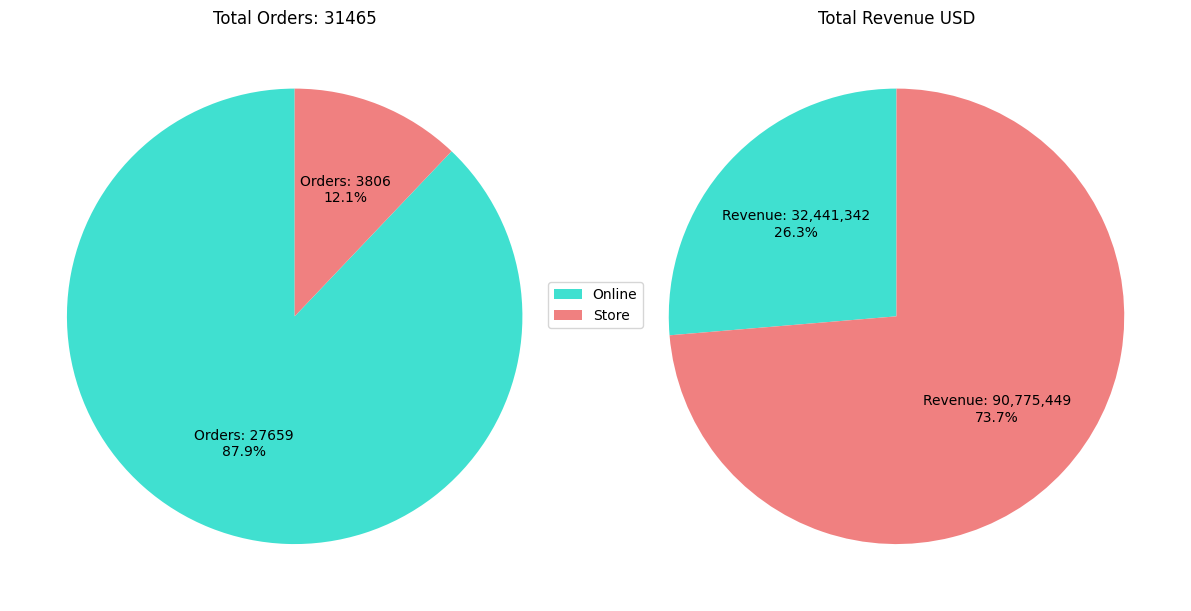

In [29]:
order_type = ["Online", "Store"]
color =["turquoise","lightcoral"]

fig, axs = plt.subplots(1, 2, figsize=(12, 6),layout="constrained")
axs[0].pie(
    total_orders.values(),
    colors=color,
    startangle=90,
    autopct=lambda p:f"Orders: {p*sum(total_orders.values())/100:.0f}\n{p:1.1f}%",
)

axs[0].set_title(f"Total Orders: {len(orders_df)}")

axs[1].pie(
    total_revenue.values(),
    colors=color,
    startangle=90,
    autopct=lambda p:f"Revenue: {p*sum(total_revenue.values())/100:,.0f}\n{p:1.1f}%"
)
axs[1].set_title("Total Revenue USD")
fig.legend(order_type,loc="center")

Det är totalt 31456 ordrar som gjorts, varav 27659 online och 3806 in-stores.\
87.9% av alla köp är gjorda online som avgör endast 26.3% av intäkterna, medans 12.1% av köp gjorda in-stores är 73.7% av intäkterna.

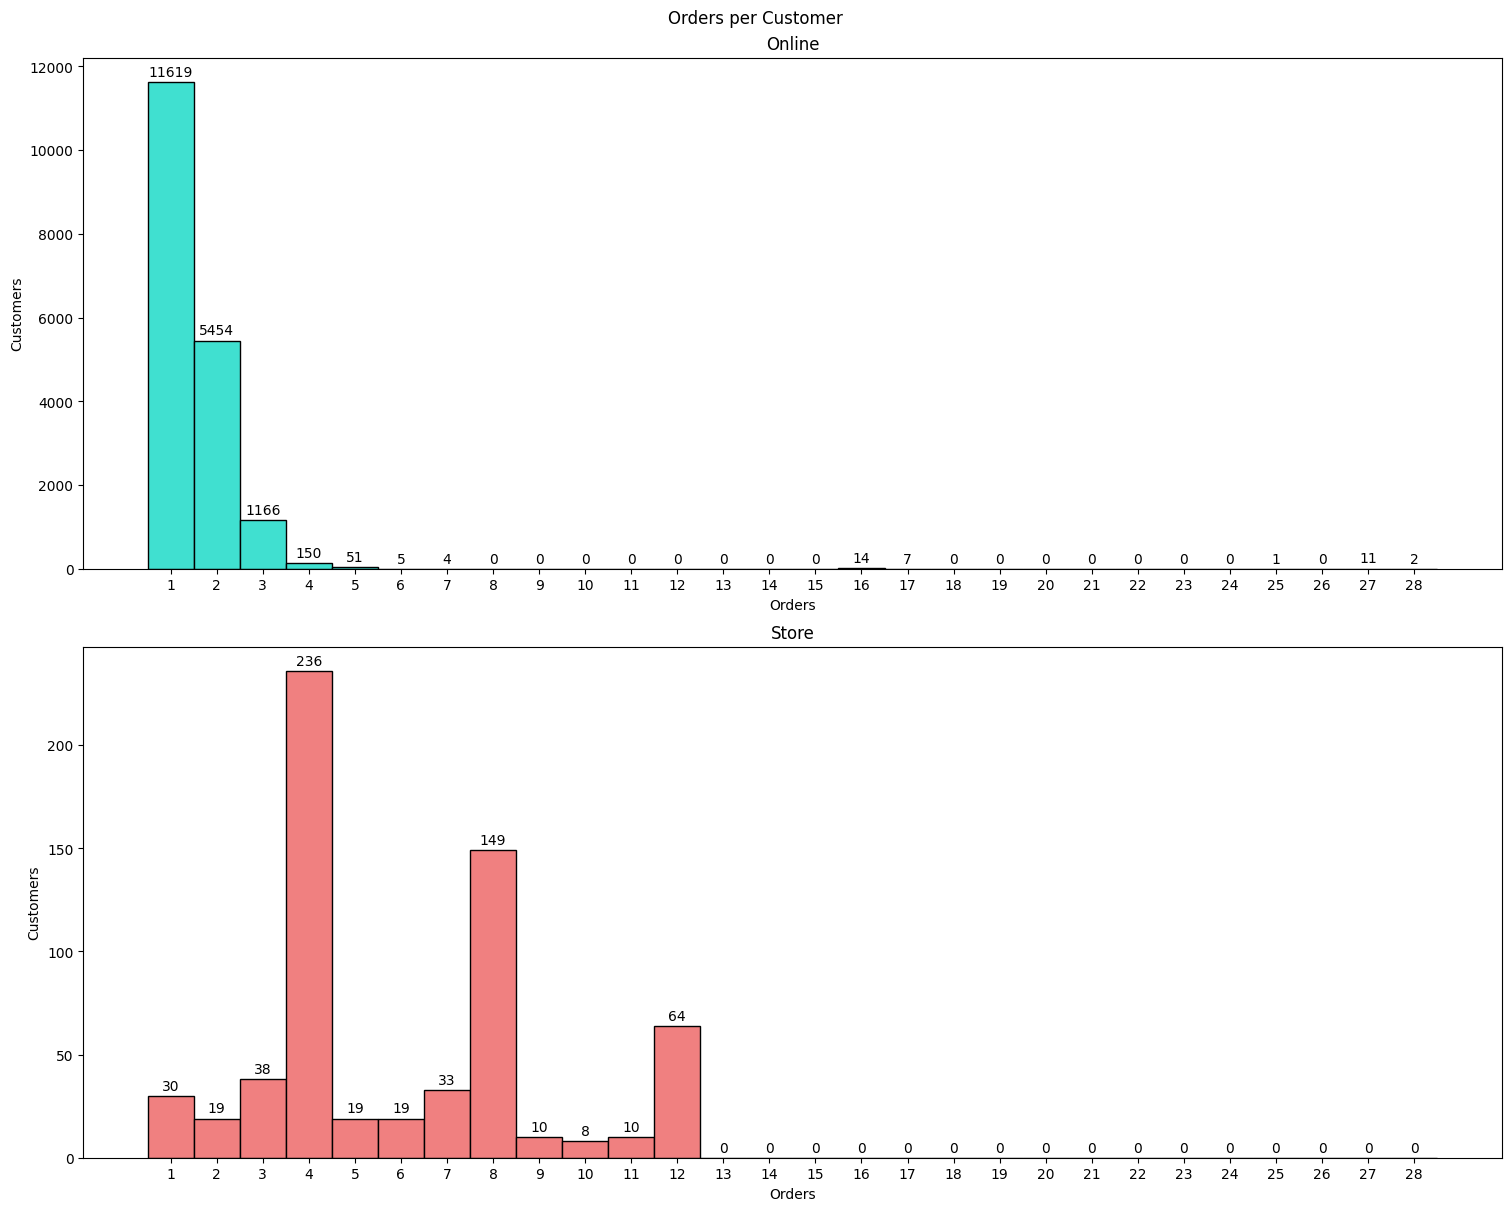

In [13]:
order_count = [
    online_df["CustomerID"].value_counts(),
    store_df["CustomerID"].value_counts(),
]

fig, axs = plt.subplots(2, 1, figsize=(15, 12), layout="constrained")
fig.suptitle("Orders per Customer")

x_max = order_count[0].max()

for i, ax in enumerate(axs):
    x = np.arange(1, x_max + 2)

    hist = ax.hist(order_count[i], bins=(x - 0.5), edgecolor="black", color=color[i])
    ax.bar_label(hist[2], padding=2)
    ax.set_xticks(np.arange(1, x_max + 1))
    ax.set_xlabel("Orders")
    ax.set_ylabel("Customers")
    ax.set_title(order_type[i])
    


Det är flera engångskunder online och flera returnerade kunder in-stores.

##### Overview on Orders

In [25]:
print(
    f"Overview on Online Orders as whole:\nTotal Orders: {len(online_df)}",
    f"\nUnique Customers: {len(online_df["CustomerID"].unique())}",
    f"\nAverage Orders per customer: {online_df.groupby("CustomerID")["TotalOrders"].first().mean():.2f}",
    f"\nAverage Products per order: {online_df["ItemQty"].mean():.2f}",
    f"\nAverage Cost per orders: {online_df["TotalDue"].mean():.2f}\n",
)

print(
    f"Overview on Store Orders as whole:\nTotal Orders: {len(store_df)}",
    f"\nUnique Customers: {len(store_df["CustomerID"].unique())}",
    f"\nAverage Orders per customer: {store_df.groupby("CustomerID")["TotalOrders"].first().mean():.2f}",
    f"\nAverage Products per order: {store_df["ItemQty"].mean():.2f}",
    f"\nAverage Cost per orders: {store_df["TotalDue"].mean():.2f}",
)

Overview on Online Orders as whole:
Total Orders: 27659 
Unique Customers: 18484 
Average Orders per customer: 1.50 
Average Products per order: 2.18 
Average Cost per orders: 1172.90

Overview on Store Orders as whole:
Total Orders: 3806 
Unique Customers: 635 
Average Orders per customer: 5.99 
Average Products per order: 56.36 
Average Cost per orders: 23850.62


Här ser vi tydligare att butikskunder handlar och spenderar i genomsnitt mer, där genomsnittskostnaden nästan är 20 gånger mer.

##### Unique Customer's Statistics
**Totals each unique customer's order cost and items purchased**

In [245]:
print(online_df.columns)

def create_stats(df):
    temp_stat = (
        df.groupby("CustomerID")
        .aggregate(
            {
                "TotalOrders": "first",
                "TotalDue": "sum",
                "ItemQty": "sum",
            }
        )
        .rename(columns={"TotalOrders": "Orders", "TotalDue": "OrderTotal"})
        .reset_index()
    )
    unique_customers = (
        temp_stat[["Orders"]]
        .value_counts()
        .reset_index(name="UniqueCustomers")
        .set_index("Orders")
    )
    products = temp_stat.groupby("Orders")["ItemQty"].aggregate(
        Products="sum", MaxProducts="max", MinProducts="min", AvgProducts="mean"
    )
    rev = temp_stat.groupby("Orders")["OrderTotal"].aggregate(
        Revenue="sum", MaxSpent="max", MinSpent="min", AvgSpent="mean"
    )
    return (
        unique_customers.join(products, on="Orders").join(rev, on="Orders").sort_index()
    )

online_stats = create_stats(online_df)
store_stats = create_stats(store_df)

display(online_stats)
display(store_stats)

Index(['CustomerID', 'TotalOrders', 'SalesOrderID', 'ItemQty', 'TotalDue',
       'OnlineOrderFlag'],
      dtype='object')


,UniqueCustomers,Products,MaxProducts,MinProducts,AvgProducts,Revenue,MaxSpent,MinSpent,AvgSpent
Orders,,,,,,,,,
1,11619,27412,8,1,2.359239,7.456502e+06,3953.9884,2.5305,641.750768
2,5454,21451,10,2,3.933077,1.765645e+07,6870.0171,11.0280,3237.340071
3,1166,7729,13,3,6.628645,6.398538e+06,9348.5764,38.1889,5487.596879
4,150,1521,15,4,10.140000,6.354021e+05,12044.0802,72.9191,4236.014165
5,51,611,17,7,11.980392,1.450332e+05,14691.3950,141.2191,2843.788047
6,5,74,17,12,14.800000,6.157728e+04,14265.1836,10309.8707,12315.456120
7,4,71,25,12,17.750000,4.971000e+04,12673.4532,12230.1493,12427.499900
16,14,459,43,26,32.785714,1.166643e+04,1134.0509,620.4912,833.316471
17,7,230,36,31,32.857143,7.022024e+03,1276.8501,876.8733,1003.146300


,UniqueCustomers,Products,MaxProducts,MinProducts,AvgProducts,Revenue,MaxSpent,MinSpent,AvgSpent
Orders,,,,,,,,,
1,30,51,5,1,1.700000,2.502407e+04,6997.2556,1.5183,834.135693
2,19,71,11,2,3.736842,3.001389e+04,5794.6949,65.5890,1579.678389
3,38,465,68,3,12.236842,1.961738e+05,19798.5095,383.0017,5162.467689
4,236,55376,1363,4,234.644068,2.519216e+07,606819.6087,1194.4582,106746.435189
5,19,432,105,5,22.736842,3.342620e+05,98196.5690,1821.0996,17592.736442
6,19,1055,382,7,55.526316,5.911250e+05,167452.6003,3167.0972,31111.840289
7,33,3018,448,9,91.454545,1.195342e+06,182777.7771,4010.9492,36222.499155
8,149,92226,2554,10,618.966443,3.372688e+07,841866.5522,3358.5076,226354.919358
9,10,1340,342,15,134.000000,1.067581e+06,194043.4591,18275.1045,106758.142360


Vi kan se att kundernas beteende skiljer sig mellan Online och Store.\
Exempelvis returnerande kunder:
- Online: Spenderar mindre ju oftare de handlar
- Store: Spenderar mer ju oftare de handlar

Detta kan bero på flera faktorer, min teori är att de som handlar online beställer små tillbehör ofta. medan de som handlar i butik kanske är återsäljare eller liknande då de spenderar mer och köper därför mer åt gången.

##### Revenue grouped by order

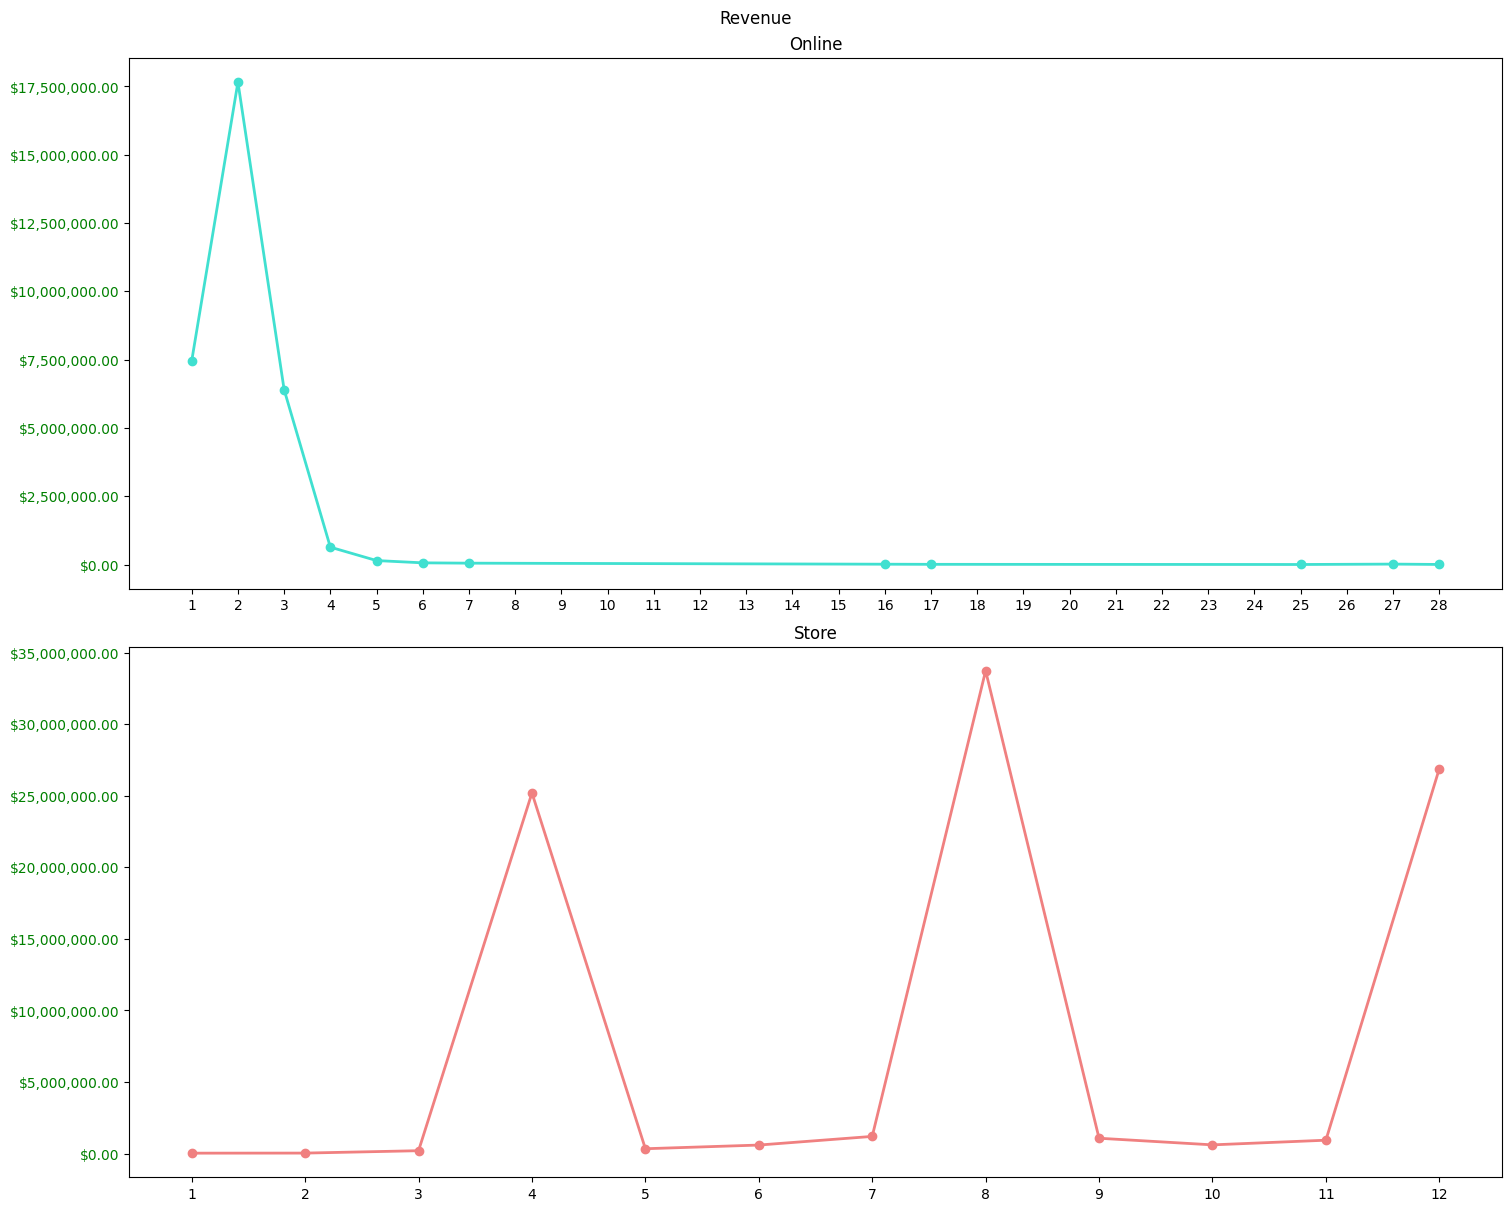

In [246]:
rev=[online_stats["Revenue"],store_stats["Revenue"]]
x_max= [online_stats.index.max(),store_stats.index.max()]

#print(x_max)
fig, axs = plt.subplots(2, 1, figsize=(15, 12), layout="constrained")
fig.suptitle("Revenue")
for i,ax in enumerate(axs):
    plot=ax.plot(rev[i],lw=2,marker="o",color=color[i])
    ax.set_xticks(np.arange(1, x_max[i] + 1))
    ax.yaxis.set_major_formatter('${x:,.2f}')
    ax.yaxis.set_tick_params(which="major",labelcolor="green")
    ax.set_title(order_type[i])


Vi ser att grafen Online för mesta del matchar grafen för unika kunder, dvs större grupp = högre intäktsbelopp.\
En avvikelse att peka ut är:

Grupp 2 är nästan hälften så liten som grupp 1, men de har beställt nästan lika många gånger (10908) och spenderat nästan dubbelt så mycket.

In [257]:
display(online_stats.sort_values(["Revenue"],ascending=False).head(2))

,UniqueCustomers,Products,MaxProducts,MinProducts,AvgProducts,Revenue,MaxSpent,MinSpent,AvgSpent
Orders,,,,,,,,,
2,5454,21451,10,2,3.933077,1.765645e+07,6870.0171,11.0280,3237.340071
1,11619,27412,8,1,2.359239,7.456502e+06,3953.9884,2.5305,641.750768


Grafen Store visar annat. Det stämmer att de tre största grupperna har högst intäktsbelopp, men värt att peka ut är att de spenderat ungefär lika mycket även fast skillnaden på gruppstorlekerna är markant.

Vi ser att ordergrupp 12:
- spenderar i genomsnitt nästan dubbelt så mycket som grupp 8 och 4 gånger så mycket som grupp 4.
- köper i genomsnitt mest produkter per gång

In [ ]:
display(store_stats.sort_values(["Revenue"],ascending=False).head(3))

,UniqueCustomers,Products,MaxProducts,MinProducts,AvgProducts,Revenue,MaxSpent,MinSpent,AvgSpent
Orders,,,,,,,,,
8,149,92226,2554,10,618.966443,3.372688e+07,841866.5522,3358.5076,226354.919358
12,64,57434,2737,83,897.406250,2.688222e+07,989184.0820,43717.8009,420034.743727
4,236,55376,1363,4,234.644068,2.519216e+07,606819.6087,1194.4582,106746.435189


##### Compares the cost per order, to the overall average order cost

Text(0.5, 1.0, 'Store')

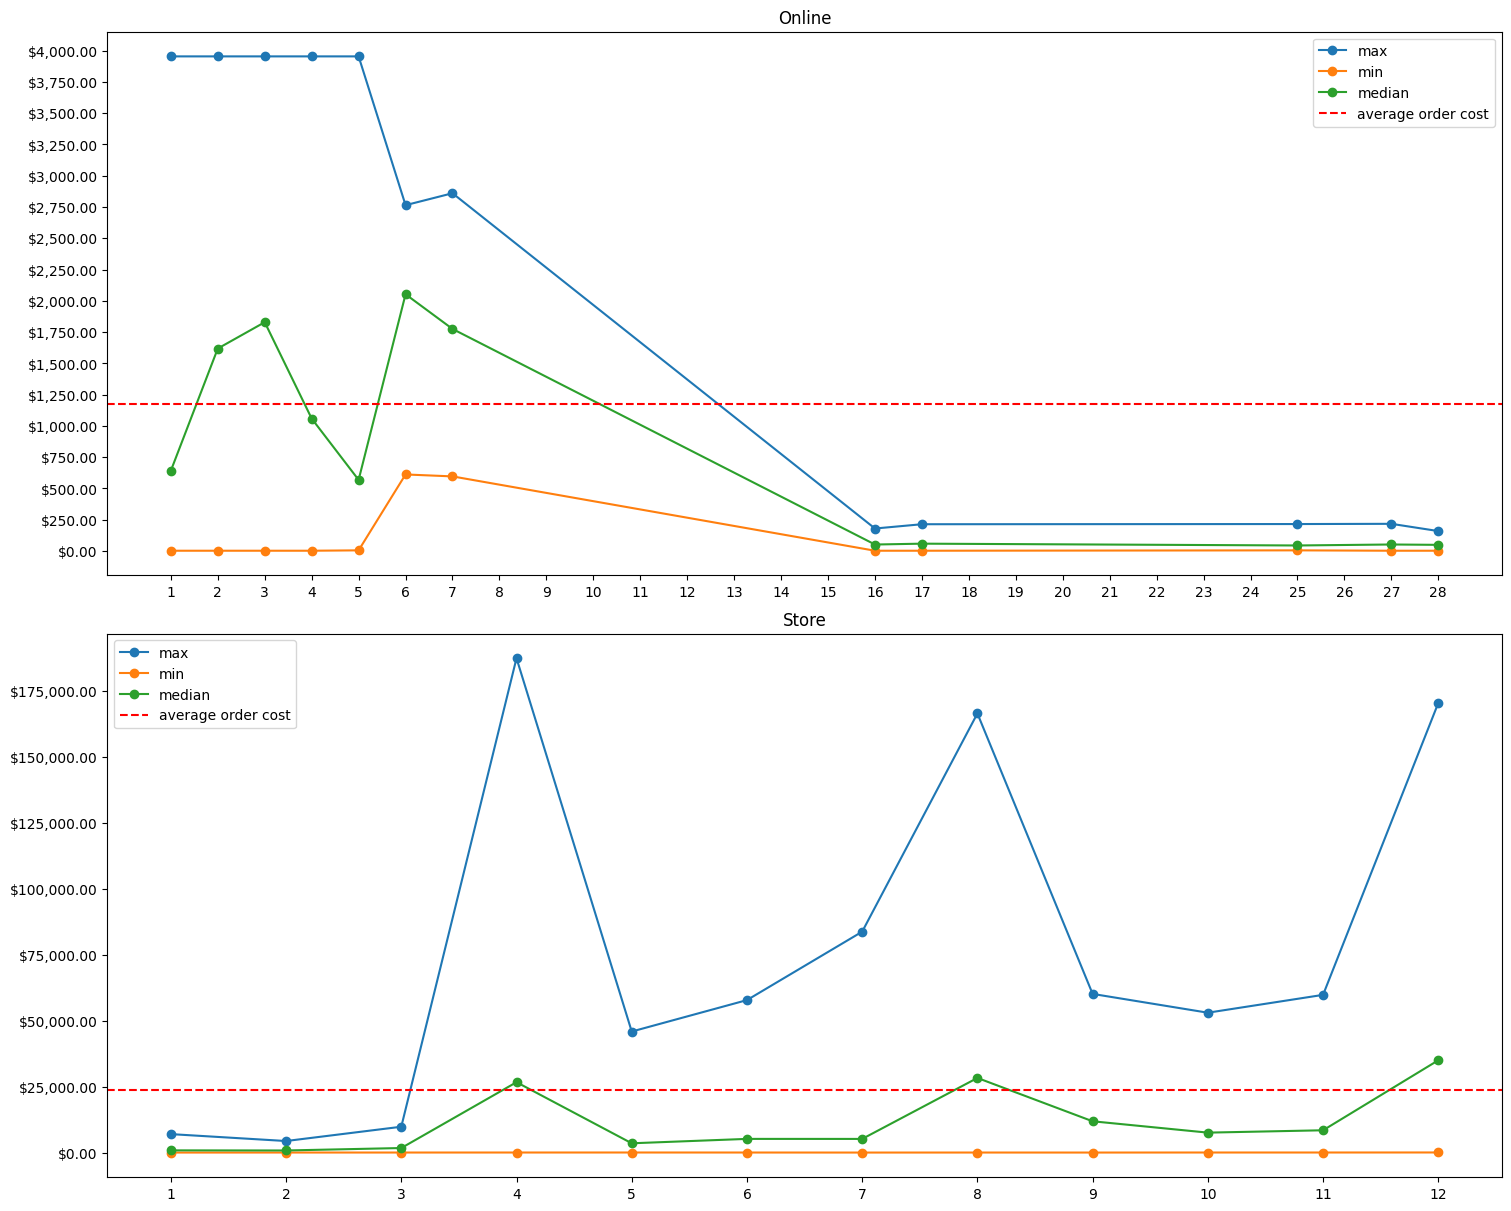

In [262]:
fig, axs = plt.subplots(2, 1, figsize=(15, 12), layout="constrained")

# ------------ Online ------------
axs[0].plot(online_df.groupby("TotalOrders")["TotalDue"].max(), marker="o")
axs[0].plot(online_df.groupby("TotalOrders")["TotalDue"].min(), marker="o")
axs[0].plot(online_df.groupby("TotalOrders")["TotalDue"].mean(), marker="o")
axs[0].axhline(online_df["TotalDue"].mean(), color="red", linestyle="--")

axs[0].set_yticks(np.arange(0, online_df["TotalDue"].max() + 250, 250))
axs[0].yaxis.set_major_formatter("${x:,.2f}")
axs[0].set_xticks(np.arange(1, x_max[0] + 1))
axs[0].legend(["max", "min", "median","average order cost"])
axs[0].set_title("Online")

# ------------ Store ------------

axs[1].plot(store_df.groupby("TotalOrders")["TotalDue"].max(), marker="o")
axs[1].plot(store_df.groupby("TotalOrders")["TotalDue"].min(), marker="o")
axs[1].plot(store_df.groupby("TotalOrders")["TotalDue"].mean(), marker="o")
axs[1].axhline(store_df["TotalDue"].mean(), color="red", linestyle="--")

axs[1].set_xticks(np.arange(1, x_max[1] + 1))
axs[1].yaxis.set_major_formatter("${x:,.2f}")
axs[1].legend(["max", "min", "median","average order cost"])
axs[1].set_title("Store")


Grafen visar kostnaden på ordernivå. 

Online ser vi att:
- Grupp 2, 3, 6, 7 spenderar i genomsnitt mer än ordergenomsnittet.
- Grupp 6 och grupp 7 som består av 5 respektive 4 kunder, spenderar i genomsnittligt mest per order.
- 3953.9884 är en återkommande max, detta är högst troligt priset på en populär produkt.\
samma sak om 2.5305 som är en återkommande min.\
Vi kommer inte titta närmare på vad det är för specifika produkter.

Store ser vi att:
- Grafen är väldigt lik revenue grafen.
- Hur mycket varje order kostar skiljer extremt mycket, vilket i sin tur ökat ordergenomsnittet.
- Dyraste ordern är från ordergrupp 4, följt av grupp 12 och grupp 8

In [ ]:
display(
    online_df[["TotalOrders", "TotalDue"]]
    .groupby("TotalOrders")["TotalDue"]
    .describe()[["count", "mean", "max", "50%", "min"]]
)
display(
    store_df[["TotalOrders", "TotalDue"]]
    .groupby("TotalOrders")["TotalDue"]
    .describe()[["count", "mean", "max", "50%", "min"]]
)

,count,mean,max,50%,min
TotalOrders,,,,,
1,11619.0,641.750768,3953.9884,77.33900,2.5305
2,10908.0,1618.670035,3953.9884,1297.80040,2.5305
3,3498.0,1829.198960,3953.9884,2410.62660,2.5305
4,600.0,1059.003541,3953.9884,98.58815,2.5305
5,255.0,568.757609,3953.9884,69.59290,5.5140
6,30.0,2052.576020,2764.6658,2570.37365,612.1369
7,28.0,1775.357129,2860.1047,2264.25360,596.6890
16,224.0,52.082279,180.1040,44.17790,2.5305
17,119.0,59.008606,214.3479,46.71940,2.5305


,count,mean,max,50%,min
TotalOrders,,,,,
1,30.0,834.135693,6997.2556,323.33635,1.5183
2,38.0,789.839195,4377.7627,472.31080,12.6968
3,114.0,1720.822563,9796.1579,931.52395,12.0152
4,944.0,26686.608797,187487.8250,15570.97450,18.3792
5,95.0,3518.547288,45901.3963,970.12760,24.0303
6,114.0,5185.306715,57825.5764,1109.41335,16.5750
7,231.0,5174.642736,83772.7786,1204.88360,3.0365
8,1192.0,28294.364920,166537.0808,17376.64370,12.0152
9,90.0,11862.015818,60170.4748,2934.86590,6.3484


##### Slutsats

Vi ser att 87.9% som handlar online, men 73.7% av intäkterna kommer från köp gjorda i butik (store).\
Vi ser att beteendet för returnerande kunder är annorlunda i grupperna, där kunder spenderar mindre ju oftare de handlar online och tvärtemot för butikskunder.

Online analysen visar också att majoriteten av intäkterna kommer från kunder som handlar 2 gånger, detta kan vara bra att kika närmare på för att potentiellt kunna replikera det för övriga ordergrupper.

#### Självvärdering

**1. Utmaningar du haft under arbetet samt hur du hanterat dem:**
  - Eftersom databasen är så stor med så mycket intressant data att titta på har det varit svårt att inte konstant ändra frågeställningen för att få med mer analys. Det hjälpte att släppa tanken att analysen måste vara perfekt.

**2. Vilket betyg du anser att du ska ha och varför?**
  - Jag känner att jag har en bra förståelse av databasen, VG.

**3. Tips du hade gett till dig själv i början av kursen nu när du slutfört den.**
  - Att fråga efter hjälp från klasskamrater och ställa frågor till er när nått är oklart istället för att sitta fast med det själv.

Muntlig presentation gjort: 26/2-25

---